## Program Assignment 04 Report
### Design
The generic form of our ODE is:
$$ \frac{dx}{dt} = f(t, x) $$
And according to the requirement, we only need a one-step method.
$$ x_{i+1} = x_i+\phi h $$
After analyze the requirement, I split the project into two parts: ODE sovler and functor. 
#### Functor
  A functor should receive input arguments and output the value accordingly.In our project, we need $t$ as a parameter. But this will break the scalability of the functor class. So in the whole project, I consider variable t as the last element of the vector x. During the ODE solving procedure, t will be updated seperately. To create a specific function for the project, I inherit the base functor class and implement the operator() function
#### ODE Solver
  The ODE Solver contains two major parts: Increment Function and Update Function. Increment Function will tell us how much we should update the X vector and the update function will maintain the status of the ODE solver. I maintain the status of the solver in ode_option and I will generate the snapshot of each step in ode_step.
  To use different method, user can set the 'method' variable to indicate which method to use.
#### Project Structure
  The solver and the functor class are put in '{Project}/ode/'. And the excutable code for the tasks are put in '{Project}/ProgramAssignments/Program04/'.
  
### Module Test
#### Current Function, double i(double t)
I sample several data points to make sure that the function i can give the correct result.
#### Accuracy for different methods
In task03, I test the method with the following configuration: x0 = 0, x_stop = 10.0, dt = 0.5.
From the table, the order of each method's error is: euler >> rk4 > rk34_adap.
### Output Result and Observation
The results of task03, 04 and 05 are in the following cells.
In task04, the value of TOL1 and TOL2 will affect the output significantly. If TOL2 = 1e-6, the error will very likely be below the tolerance and increase h for many times. This will make the output totally wrong.

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
keys = ['frd_euler', 'rk34', 'rk34_adap']
def load(path):
    lines = []
    with open(path) as f:
        for l in f:
            lines.append(l.strip())
    name = ''
    vals = {}
    for l in lines:
        if l in keys:
            vals[l] = []
            name = l
        else:
            ls = l.split()
            v = [float(a) for a in ls]
            vals[name].append(v)
    return vals

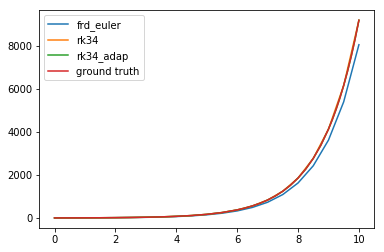

In [2]:
# task 03
t03 = load('data/03.txt')
legends = []
for k in t03:
    legends.append(k)
    ss = t03[k]
    n = len(ss)
    x = np.zeros(n)
    v = np.zeros(n)
    g = np.zeros(n)
    for i in range(n):
        x[i] = ss[i][1]
        v[i] = ss[i][2]
        g[i] = ss[i][3]
    plt.plot(x, v)
plt.plot(x, g)
plt.legend(legends + ['ground truth'], loc='upper left')
plt.show()

/Users/jin-yc10/Development/tfenv/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


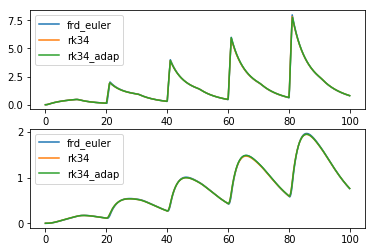

In [3]:
# task 04
t04 = load('data/04.txt')
legends = []
for k in t04:
    legends.append(k)
    ss = t04[k]
    n = len(ss)
    x = np.zeros(n)
    v1 = np.zeros(n)
    v2 = np.zeros(n)
    for i in range(n):
        x[i] = ss[i][1]
        v1[i] = ss[i][2]
        v2[i] = ss[i][3]
    plt.subplot(211)
    plt.plot(x, v1)
    plt.subplot(212)
    plt.plot(x, v2)
plt.subplot(211)
plt.legend(legends, loc='upper left')
plt.subplot(212)
plt.legend(legends, loc='upper left')
plt.show()

/Users/jin-yc10/Development/tfenv/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


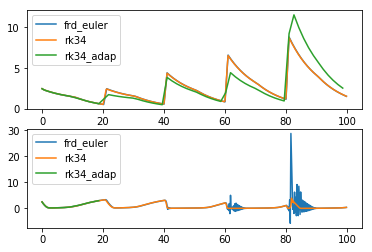

In [4]:
# task 05
t05 = load('data/05.txt')
legends = []
for k in t05:
    legends.append(k)
    ss = t05[k]
    n = len(ss)
    x = np.zeros(n)
    v1 = np.zeros(n)
    v2 = np.zeros(n)
    for i in range(n):
        x[i] = ss[i][1]
        v1[i] = ss[i][2]
        v2[i] = ss[i][3]
    plt.subplot(211)
    plt.plot(x, v1)
    plt.subplot(212)
    plt.plot(x, v2)
plt.subplot(211)
plt.legend(legends, loc='upper left')
plt.subplot(212)
plt.legend(legends, loc='upper left')
plt.show()